In [9]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

In [15]:
states = pd.read_csv('ClusterData.csv')

In [22]:
states.values

array([['Alabama', 'AL', -1.0, ..., 1, 3, 6],
       ['Arizona', 'AZ', -0.42, ..., 2, 4, 8],
       ['Arkansas', 'AR', -0.66, ..., 1, 3, 7],
       ...,
       ['West Virginia', 'WV', -0.82, ..., 3, 3, 5],
       ['Wisconsin', 'WI', -0.3, ..., 1, 2, 3],
       ['Wyoming', 'WY', -1.17, ..., 1, 4, 8]], dtype=object)

In [23]:
#Include only columns 2 and after in the dataset, exclude first column state for index
st = states[data.columns[2:]]

#Index using the first column state
st.index = states.iloc[:,1]
st.values
#st.index

array([[-1.  , -0.13,  1.1 , ...,  1.  ,  3.  ,  6.  ],
       [-0.42, -0.73, -0.1 , ...,  2.  ,  4.  ,  8.  ],
       [-0.66, -0.39, -0.64, ...,  1.  ,  3.  ,  7.  ],
       ...,
       [-0.82, -0.65, -0.26, ...,  3.  ,  3.  ,  5.  ],
       [-0.3 , -0.19, -0.75, ...,  1.  ,  2.  ,  3.  ],
       [-1.17,  0.17,  0.78, ...,  1.  ,  4.  ,  8.  ]])

In [39]:
X = scale(st)
X

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-1.03947222, -0.12215486,  1.06864153, ..., -0.9151978 ,
         0.38222336,  0.42385059],
       [-0.4360755 , -0.74592438, -0.16514785, ...,  0.24084153,
         1.34784028,  1.23764373],
       [-0.6857569 , -0.39245499, -0.72035307, ..., -0.9151978 ,
         0.38222336,  0.83074716],
       ...,
       [-0.85221117, -0.66275511, -0.3296531 , ...,  1.39688085,
         0.38222336,  0.01695402],
       [-0.3112348 , -0.18453182, -0.83345043, ..., -0.9151978 ,
        -0.58339355, -0.79683911],
       [-1.21632988,  0.1897299 ,  0.73963103, ..., -0.9151978 ,
         1.34784028,  1.23764373]])

In [40]:
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.27995802 0.15574368 0.13763548 0.09209084 0.05415634 0.04902283
 0.03811369 0.03537194 0.02596663 0.02241087 0.01594096 0.01440317
 0.01258607 0.01064748 0.00975164 0.0087497  0.00740666 0.00676069
 0.004622   0.0042974  0.0035714  0.00283563 0.00268088 0.00158394
 0.00133044 0.00127708 0.00065963 0.0004249 ]


In [41]:
pca.n_components_

28

In [43]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 28.  ,  43.57,  57.33,  66.54,  71.96,  76.86,  80.67,  84.21,
        86.81,  89.05,  90.64,  92.08,  93.34,  94.4 ,  95.38,  96.25,
        96.99,  97.67,  98.13,  98.56,  98.92,  99.2 ,  99.47,  99.63,
        99.76,  99.89,  99.96, 100.  ])

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

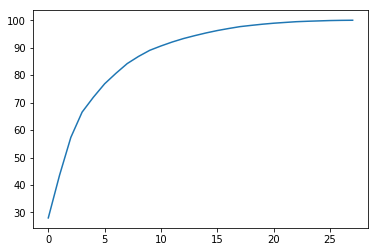

In [47]:
plt.plot(var1)

In [54]:
#Looking at above plot I will pick 15 variables
pca = PCA(n_components=15)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-2.51572119e+00  2.48589713e-01 -6.55414934e-01 -1.21065042e-01
  -1.30584392e+00  2.82703047e+00 -7.22655328e-01 -9.05450561e-01
  -3.03818916e-01 -1.59486433e+00 -2.12339336e-01  4.46548504e-01
  -4.25358433e-01  2.91429502e-01  1.22068416e-01]
 [-8.36688248e-01  2.24229508e+00  1.55424369e+00 -5.29190015e-01
   7.97883809e-01 -4.53258019e-01 -2.09838893e-01 -1.08577584e+00
  -7.27323697e-01  1.58289723e-01 -6.24892511e-01 -9.18155318e-01
  -1.75728673e-01  3.71862891e-02  3.24485364e-01]
 [-2.46190070e+00 -5.79612005e-01  1.26009673e-01  9.56000513e-01
  -2.47241193e-01  1.18493290e+00  4.43539147e-01 -4.25311944e-01
   1.39630366e+00 -1.85669005e+00  1.39767744e-01  4.08656549e-01
  -1.79302216e-01  1.37540158e-01 -3.82639002e-01]
 [ 1.84909530e+00  4.90228411e+00  2.35545152e+00  1.44540206e+00
  -1.38692492e+00 -2.21315365e+00  4.11209046e-02 -1.35845835e+00
   1.83992342e+00 -4.88989749e-01 -8.06494616e-01 -1.17938680e+00
  -7.87212028e-01 -7.04558420e-01  4.23217558e-01]
 [-8

In [48]:
cor = np.corrcoef(X.T)
cor

array([[ 1.        ,  0.51532175,  0.23462007,  0.57112495,  0.24488281,
         0.82757313,  0.23225534,  0.33901486, -0.01045925,  0.45691113,
         0.66423612,  0.41365223,  0.47220486, -0.39122986,  0.10945181,
        -0.34813298, -0.14998707,  0.36790007,  0.57310657, -0.00689066,
        -0.15053092, -0.3307189 , -0.3855448 ,  0.02657035,  0.52647604,
         0.52545952, -0.24163724, -0.23750949],
       [ 0.51532175,  1.        ,  0.30668156,  0.4176532 ,  0.33897052,
         0.42318702,  0.42248228, -0.0271459 ,  0.27820399,  0.26717717,
         0.1265098 ,  0.37024203,  0.0696034 , -0.35036045,  0.23536165,
         0.03983907, -0.42117415,  0.52175331,  0.53391946,  0.06612425,
        -0.14246009, -0.18834068, -0.2929341 ,  0.15863212,  0.04304594,
         0.35516782, -0.22770087, -0.30505632],
       [ 0.23462007,  0.30668156,  1.        ,  0.03466489,  0.02315514,
         0.26500951,  0.08448246, -0.10229254, -0.08421699,  0.30646009,
         0.0574975 ,  0.0433